In [1]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("C:/Users/charl/Downloads/diabetes.csv")

In [4]:

data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


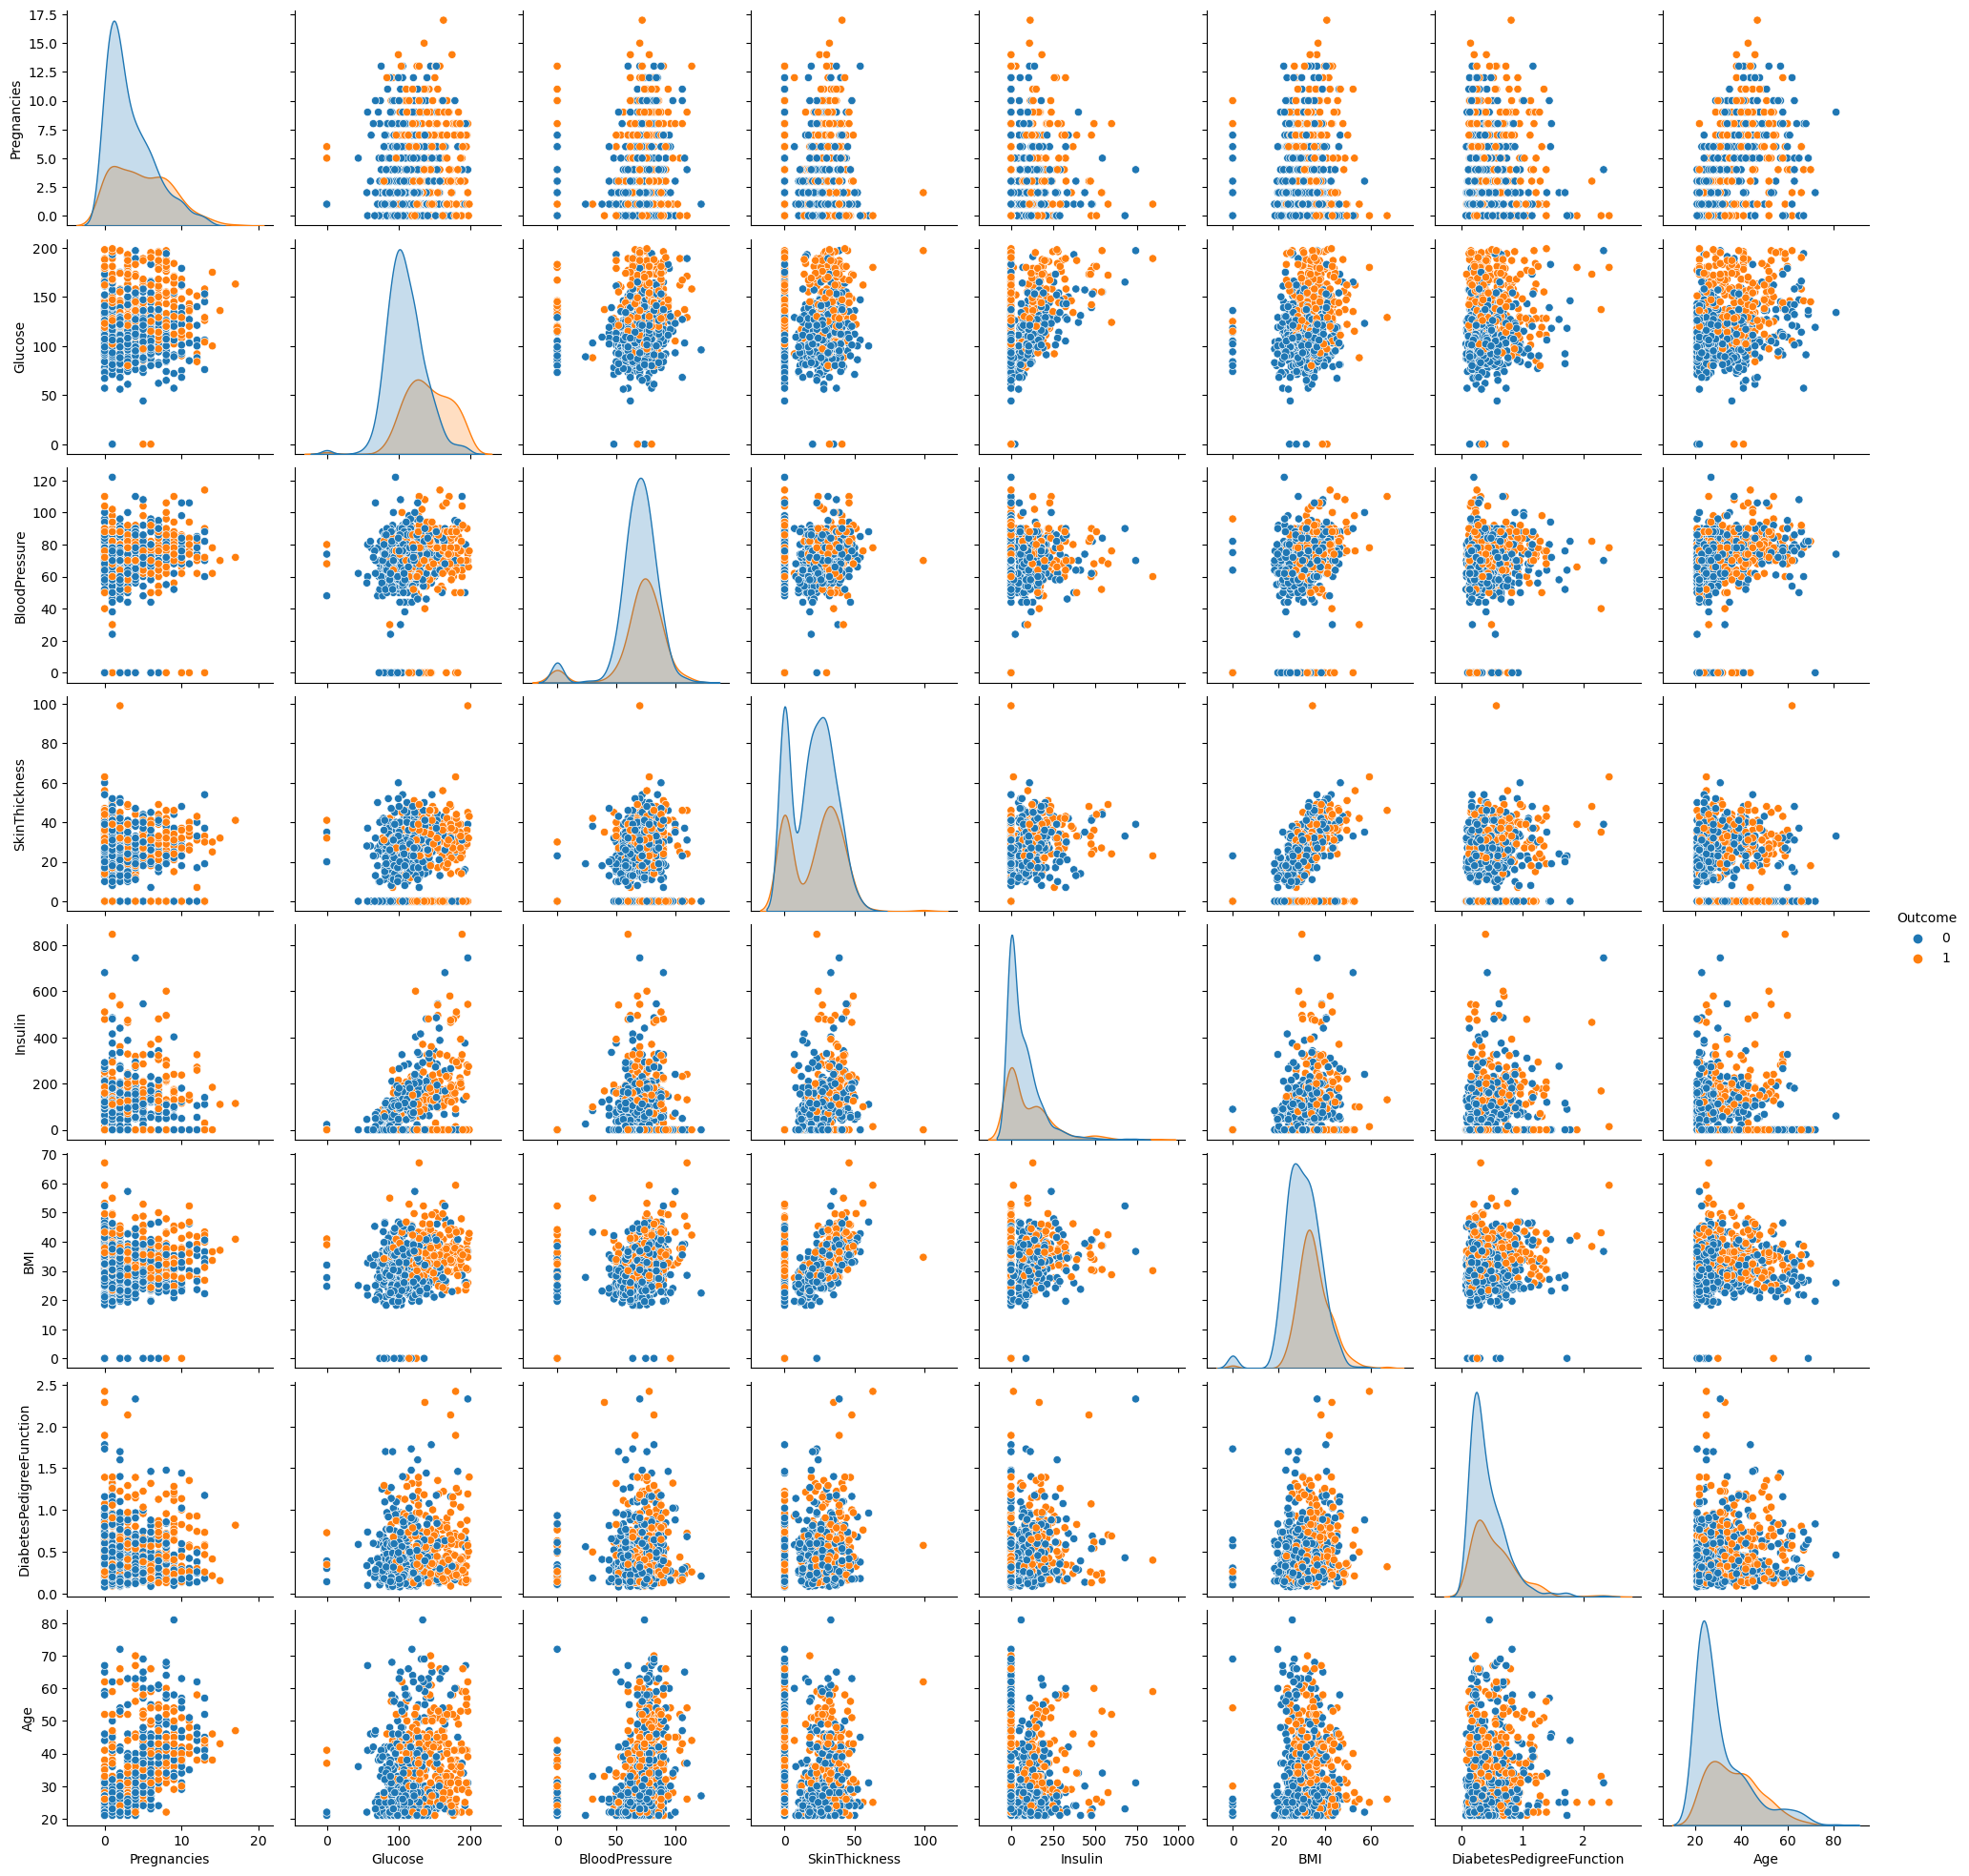

In [6]:
import seaborn as sns

sns.pairplot(data,
             vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
            hue ='Outcome')
plt.show()

In [9]:
!pip install sweetviz

     ---------------------------------------- 15.1/15.1 MB 9.3 MB/s eta 0:00:00


In [10]:
import sweetviz

                                             |          | [  0%]   00:00 -> (? left)


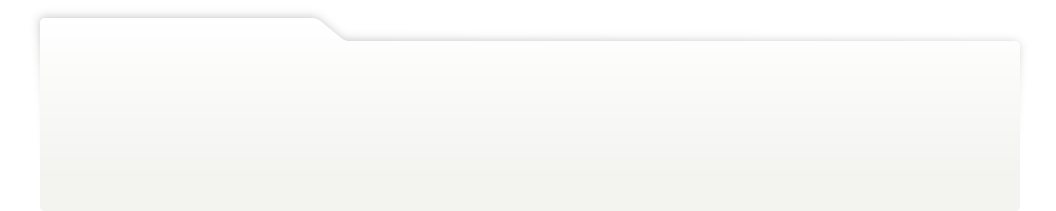
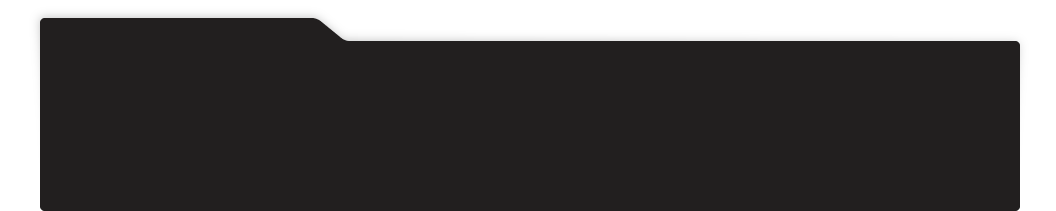
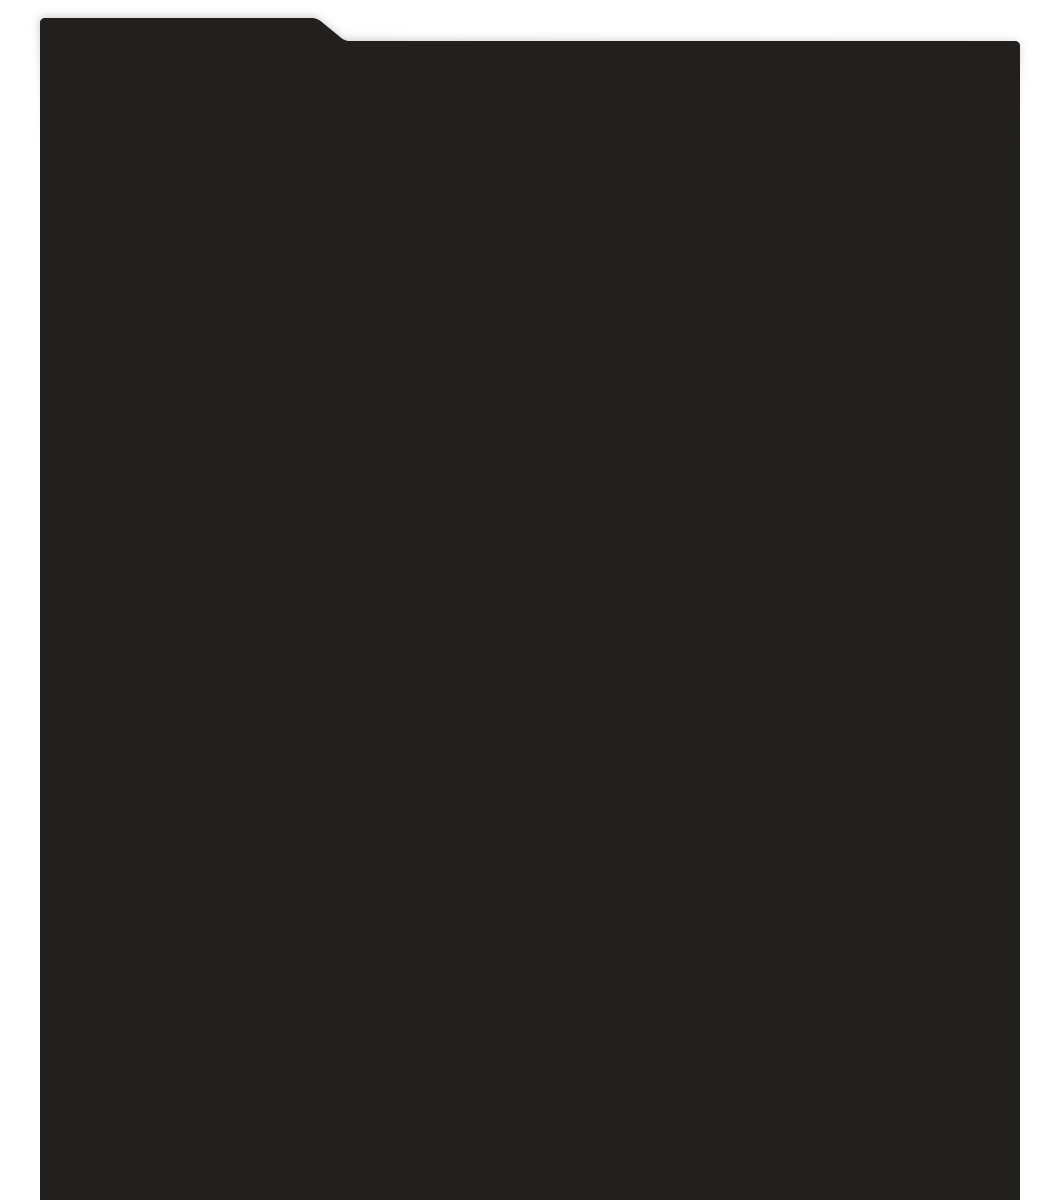
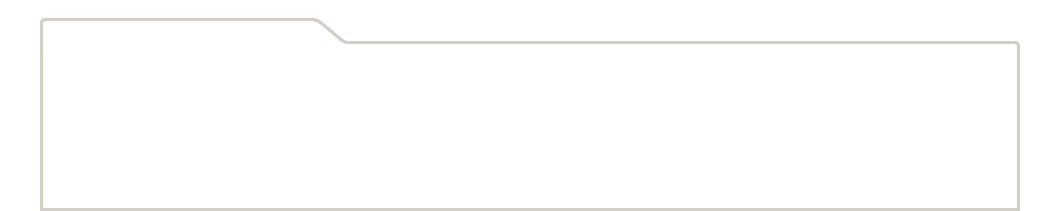
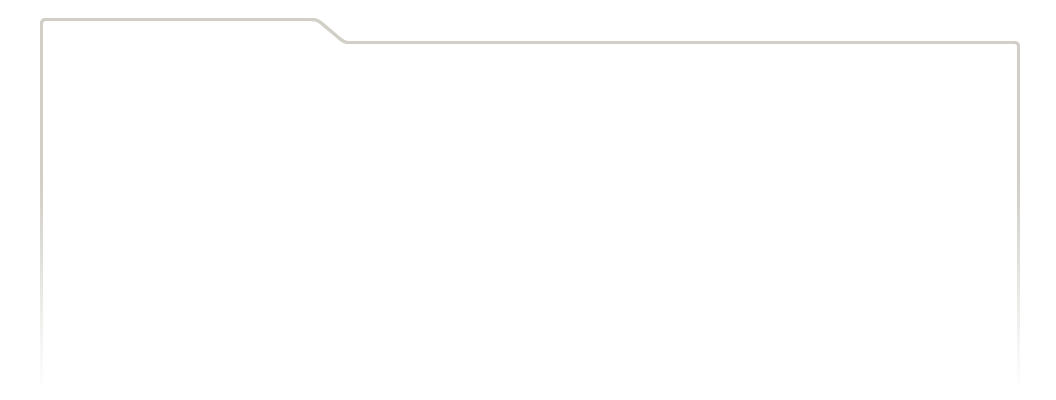
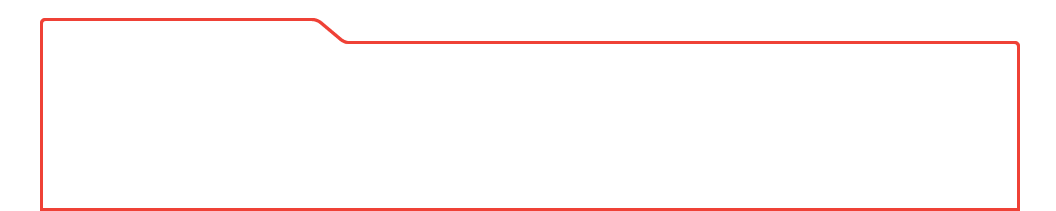
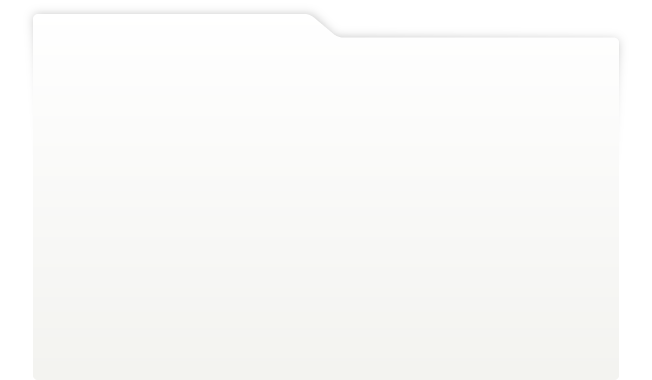
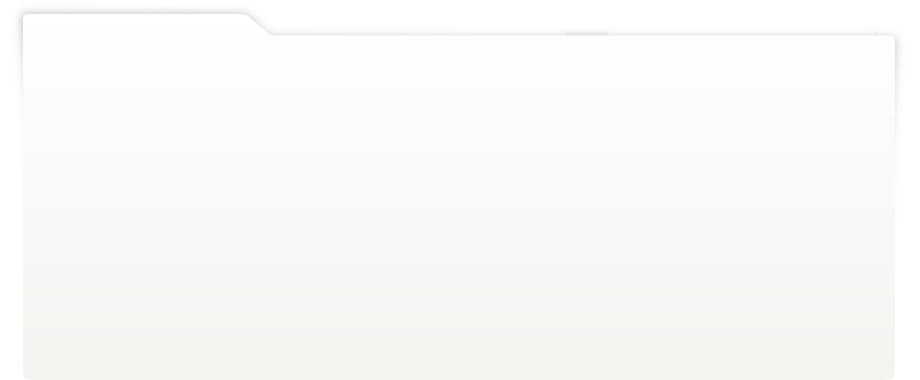
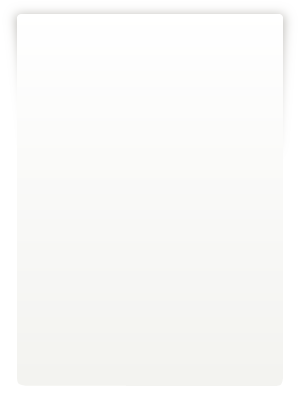
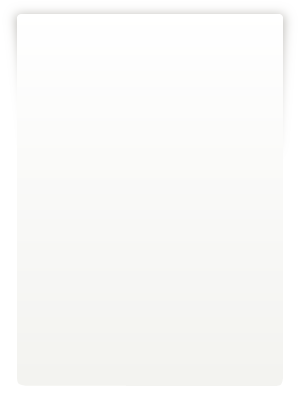
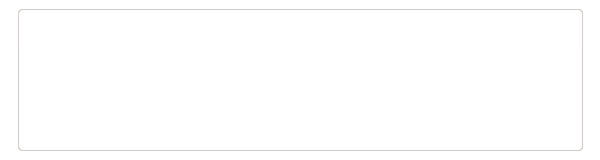
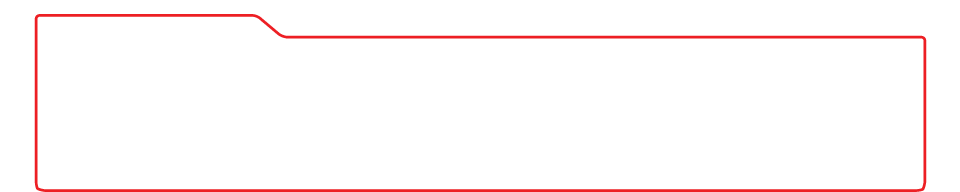
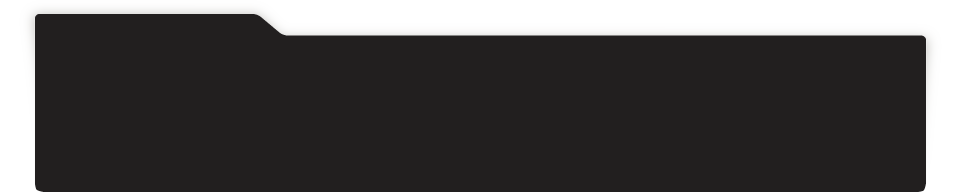
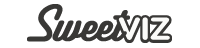
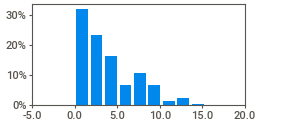
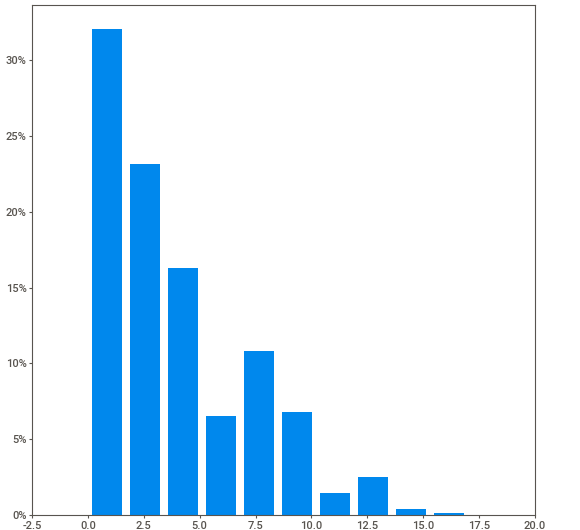
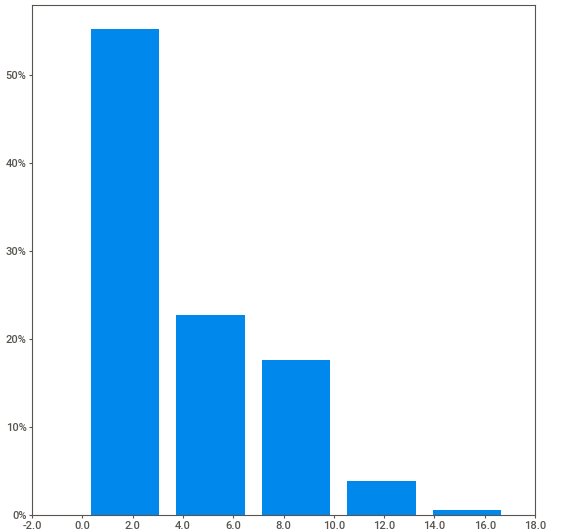
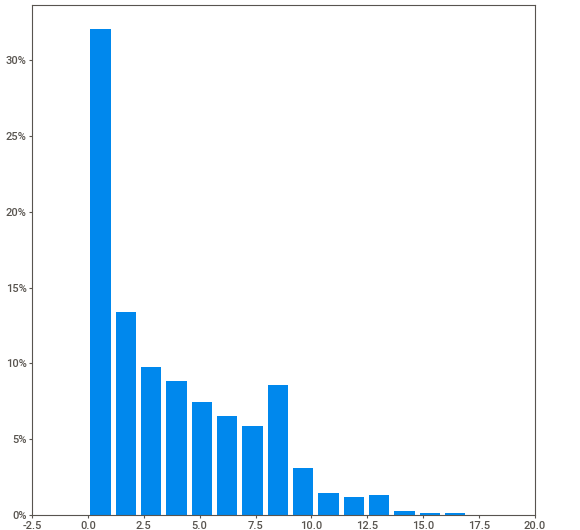
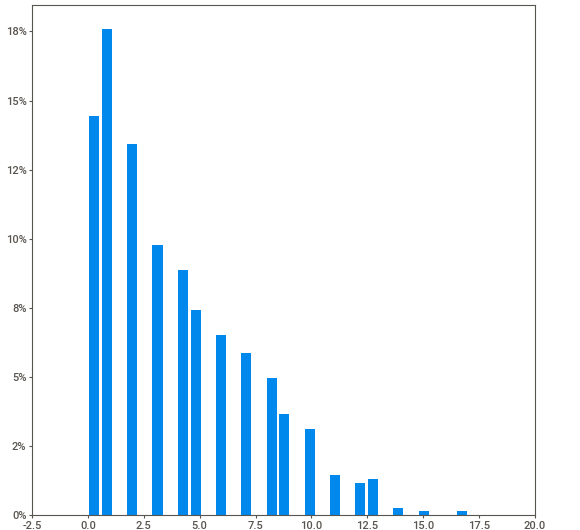
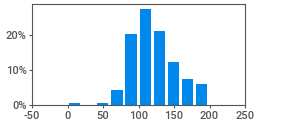
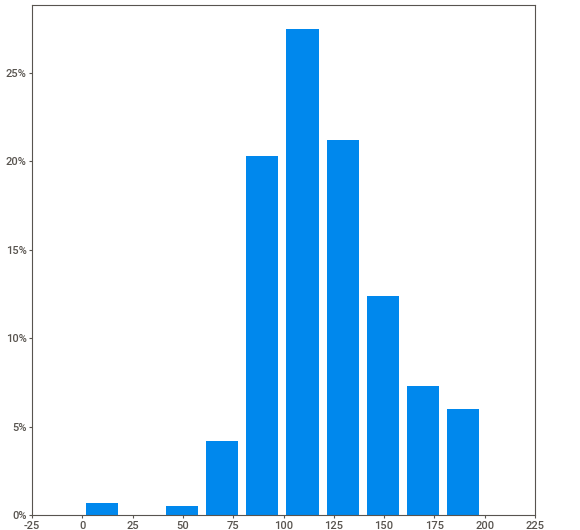
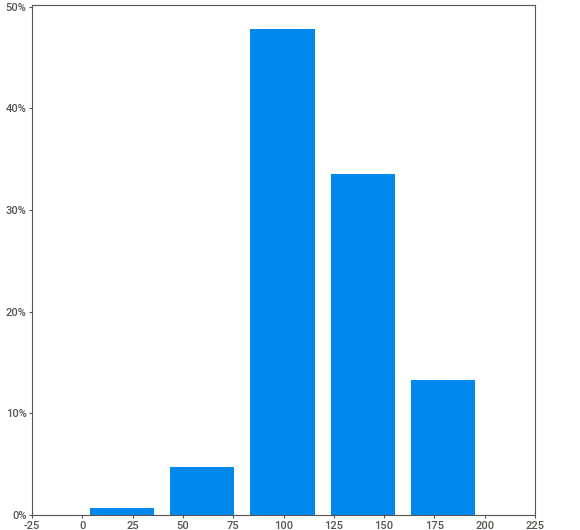
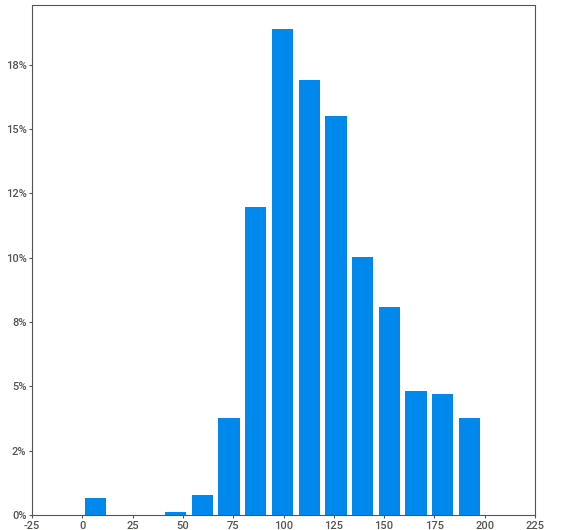
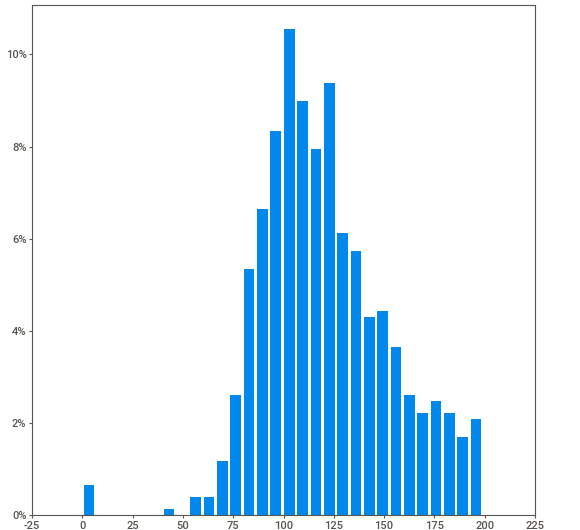
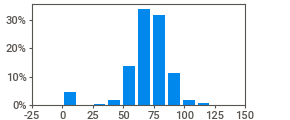
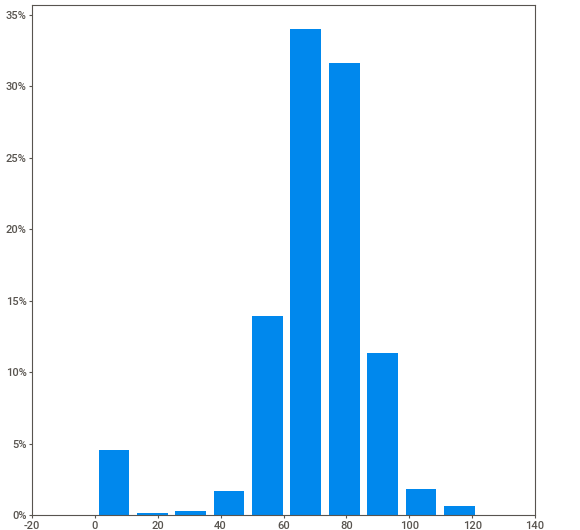
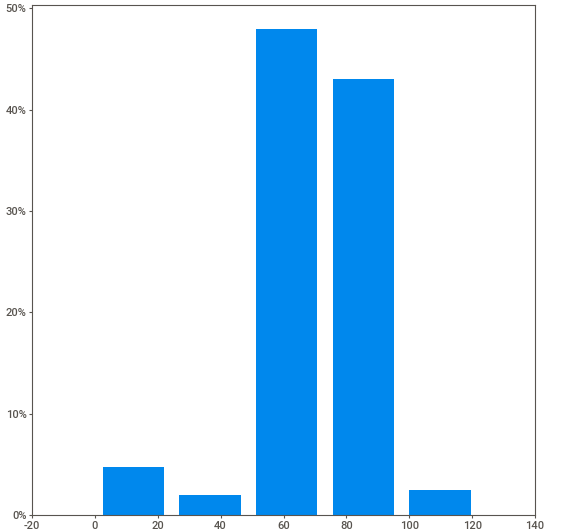
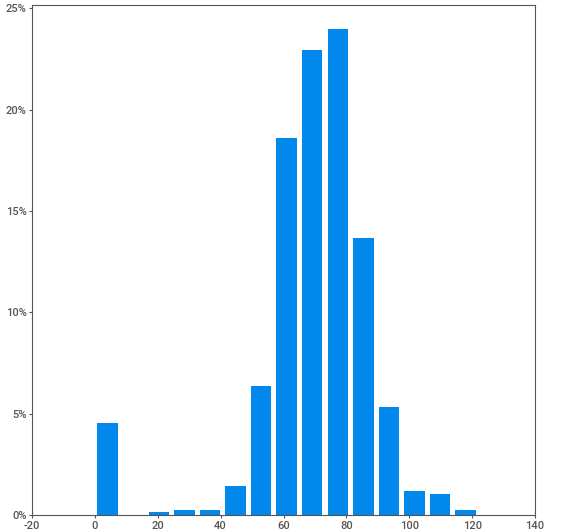
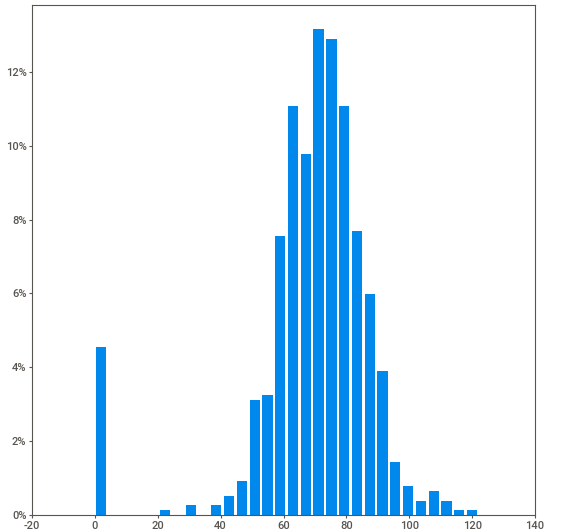
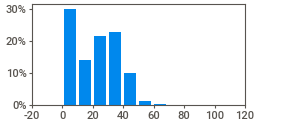
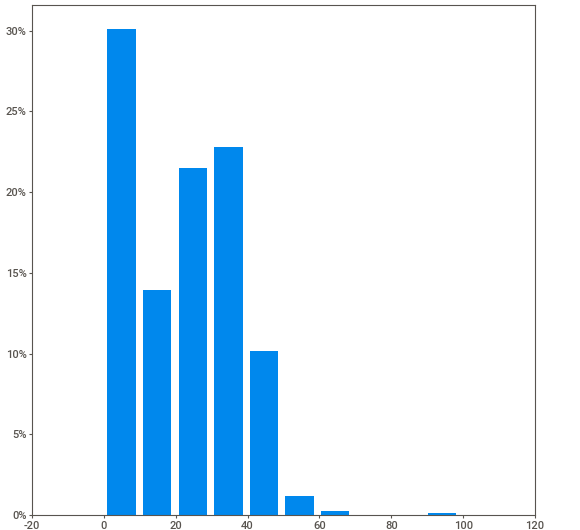
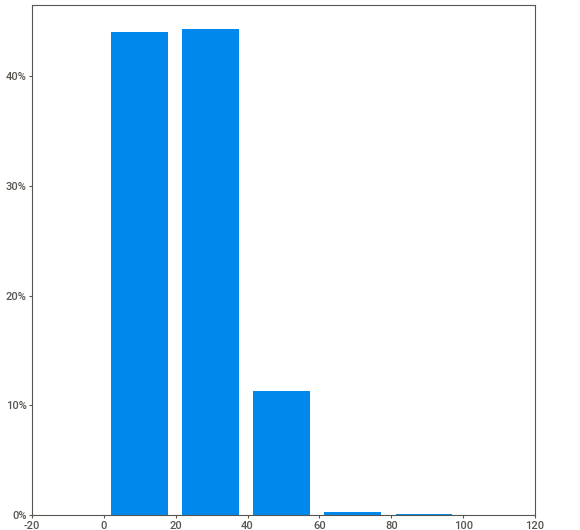
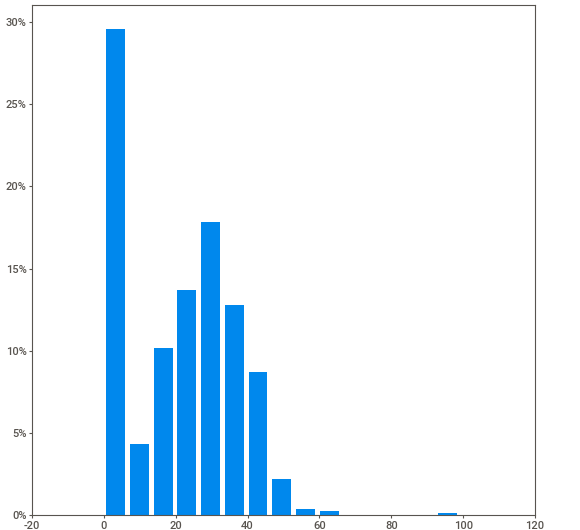
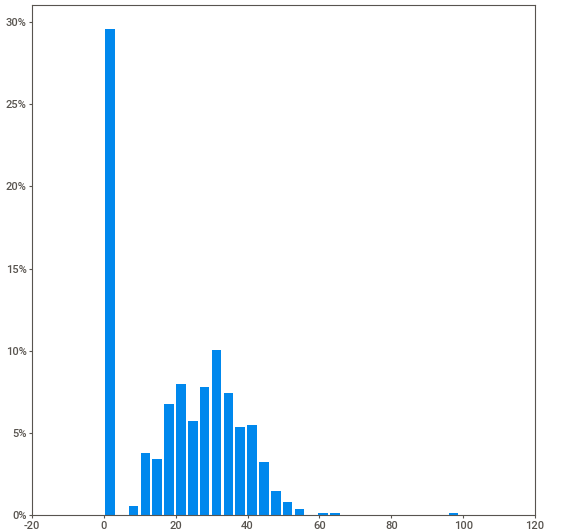
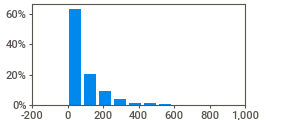
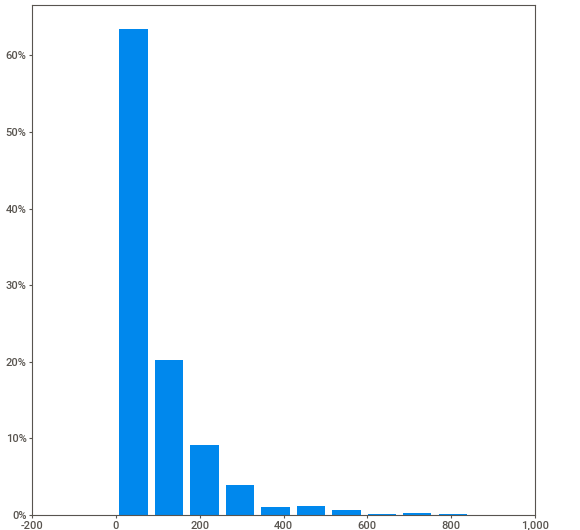
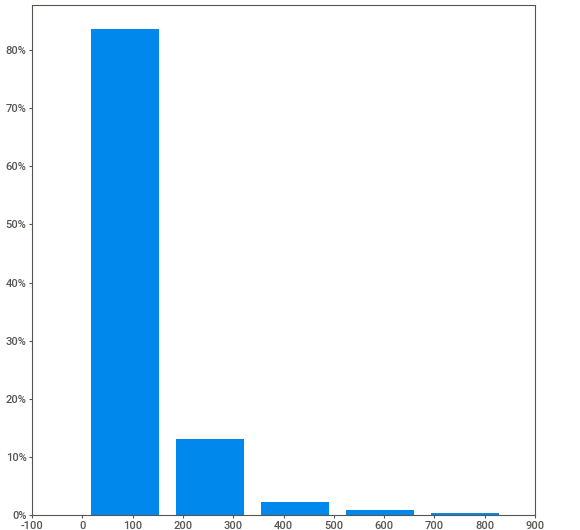
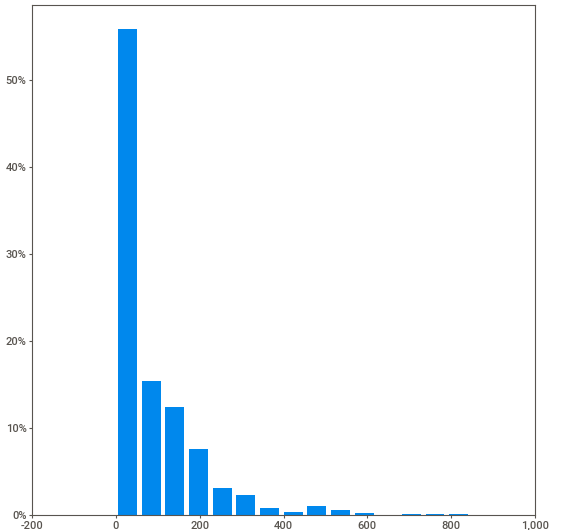
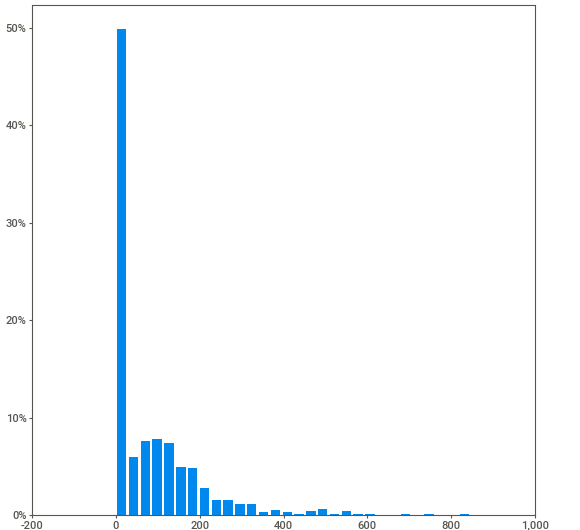
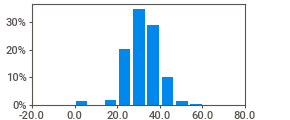
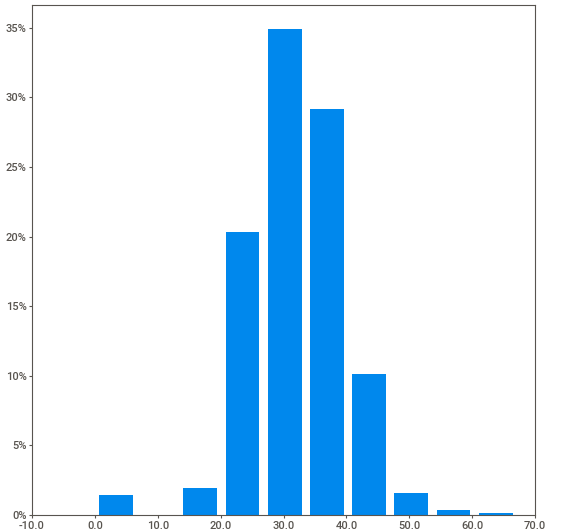
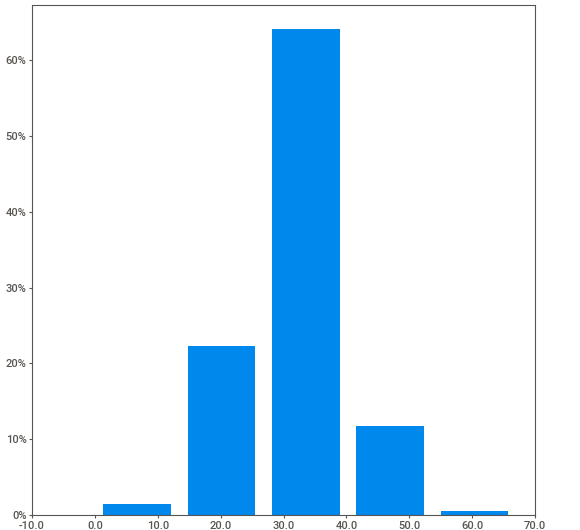
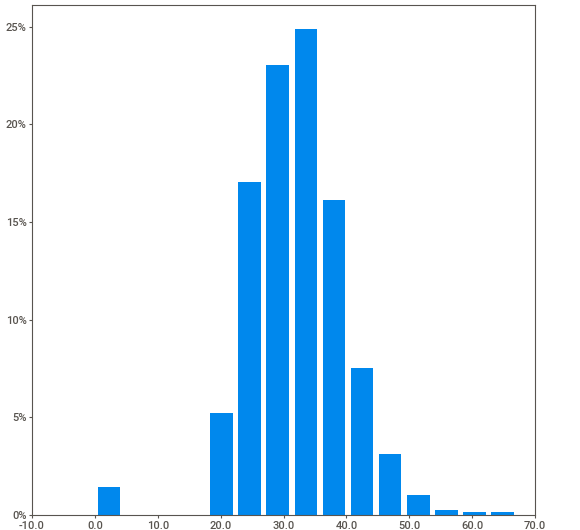
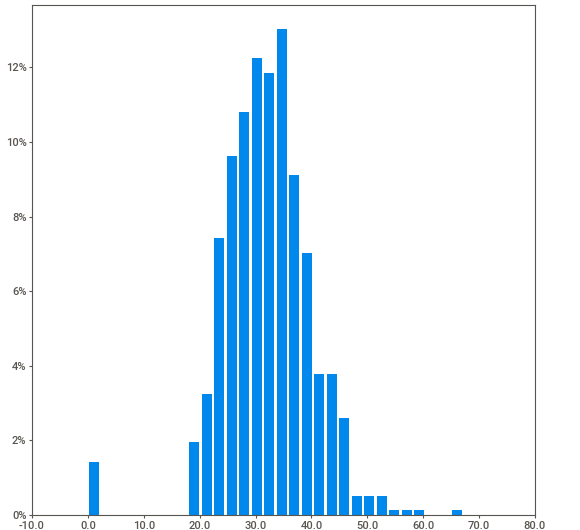
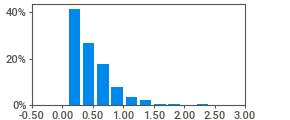
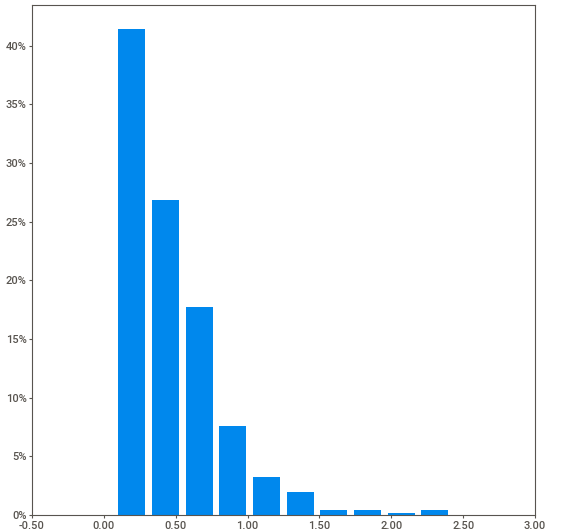
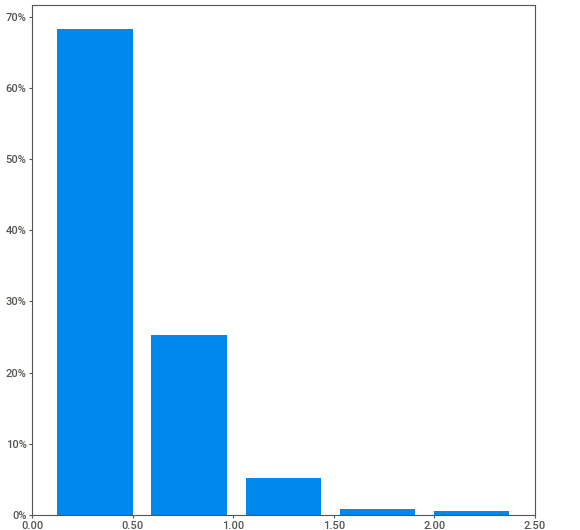
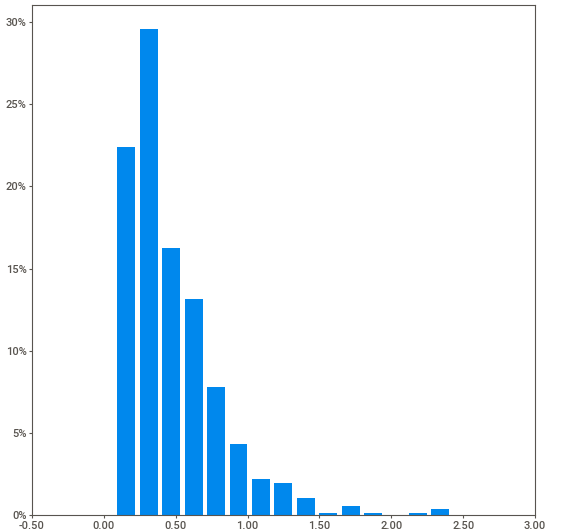
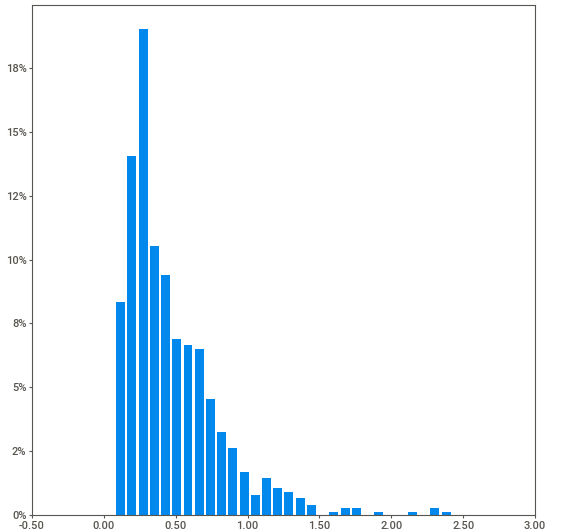
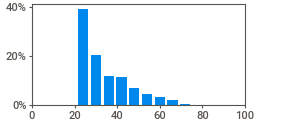
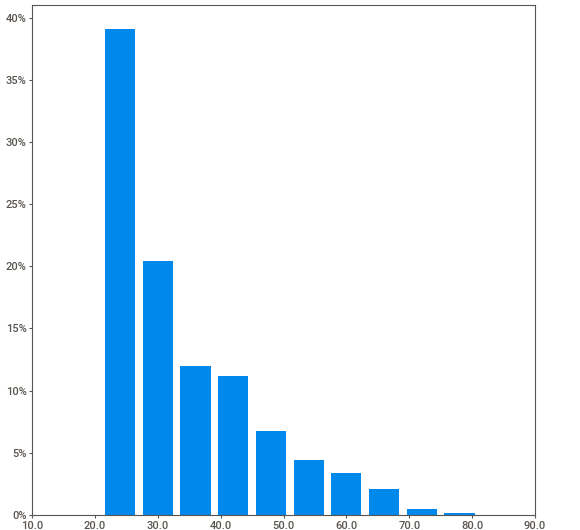
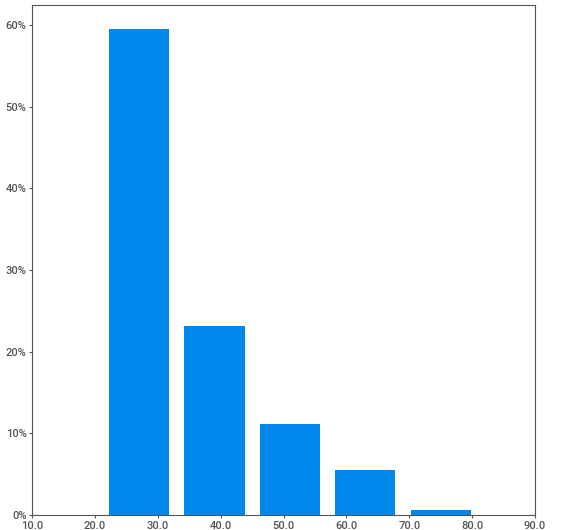
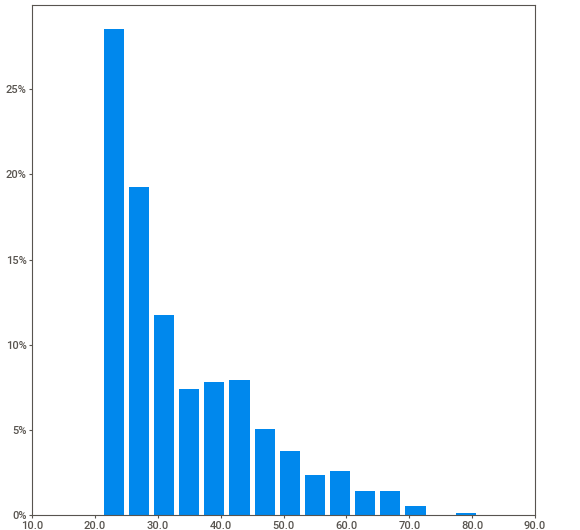
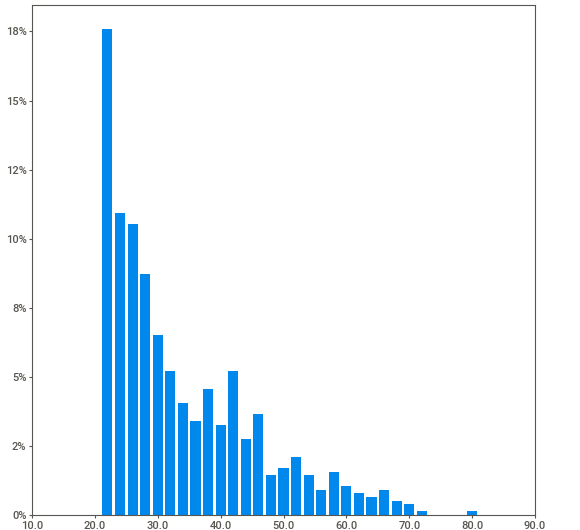
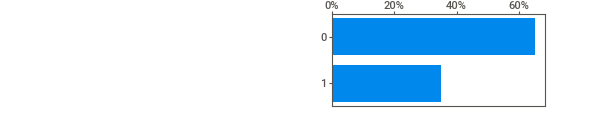
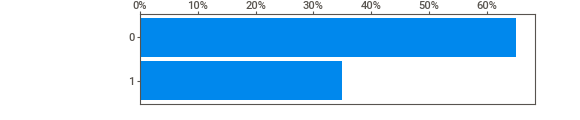
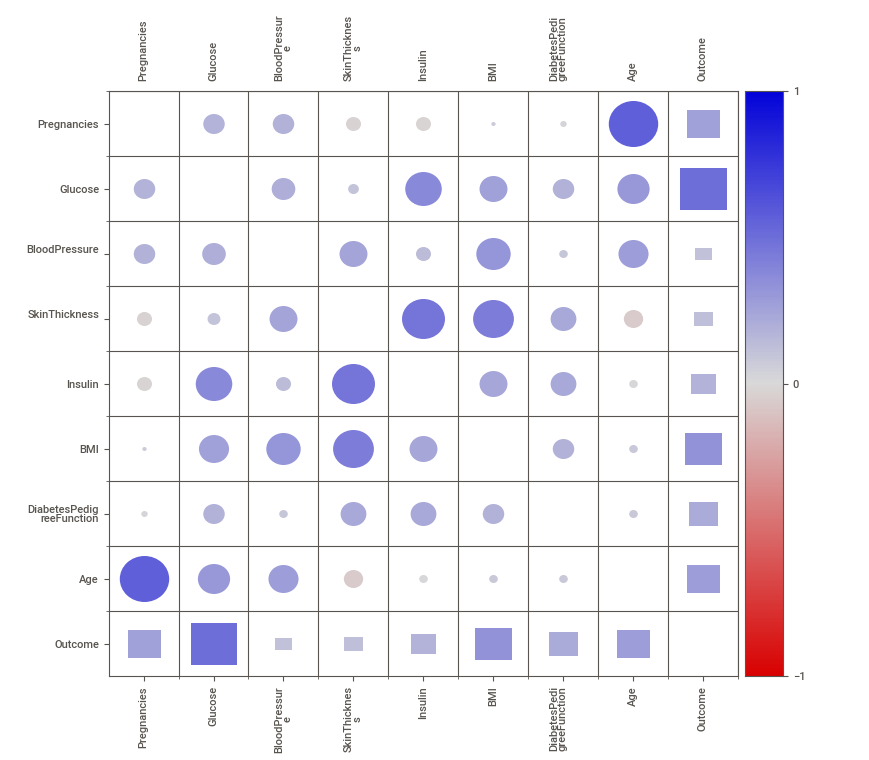
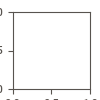

In [11]:
sweetviz.analyze(data).show_notebook()

In [12]:
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [16]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [17]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [19]:
x = data
x = x.drop(columns=['Outcome'], axis=1)

In [20]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [21]:
y = data['Outcome']

In [22]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [30]:
# train/test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=423)

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeRegressor

clf_dt = DecisionTreeRegressor()
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print(clf_dt.score(X_train, y_train))

1.0


In [32]:
mse = np.sqrt(mean_squared_error(pred_dt, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.6030226891555273


In [33]:
from sklearn.ensemble import RandomForestRegressor

rf_clf = RandomForestRegressor()
rf_clf.fit(X_train, y_train)

pred_rf = rf_clf.predict(X_test)

print(rf_clf.score(X_train, y_train))

0.9052631371444664


In [35]:
mse = np.sqrt(mean_squared_error(pred_rf, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.4312304955122495


In [36]:
from sklearn.linear_model import LinearRegression

clf_lr = LinearRegression()
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print(clf_lr.score(X_train, y_train))

0.3208707283200849


In [37]:
mse = np.sqrt(mean_squared_error(pred_lr, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.42425301359131207


In [38]:
from sklearn.svm import SVR

clf_svm = SVR()
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print(clf_svm.score(X_train, y_train))

0.3098815753956109


In [39]:
mse = np.sqrt(mean_squared_error(pred_svm, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.4463235969799062
